### **Name: Dhanashri Nitin Bhusare**
### **EDA Name: Car Crash**

## **1]Importing Modules And Libraries**

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
c4=cm.get_cmap('Set3')

## **2]Loading Data**

In [240]:
df = pd.read_csv('/content/monroe county car crach 2003-2015.csv', encoding='latin1')
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


## **3]Data Cleaning**

In [241]:
df.duplicated().sum()

64

In [242]:
df.drop_duplicates(inplace=True)

In [243]:
df.drop('Reported_Location',axis=1)


,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,0.000000,0.000000


In [244]:
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53879 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53879 non-null  int64  
 1   Month              53879 non-null  int64  
 2   Day                53879 non-null  int64  
 3   Weekend?           53811 non-null  object 
 4   Hour               53654 non-null  float64
 5   Collision Type     53873 non-null  object 
 6   Injury Type        53879 non-null  object 
 7   Primary Factor     52760 non-null  object 
 8   Reported_Location  53844 non-null  object 
 9   Latitude           53849 non-null  float64
 10  Longitude          53849 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.9+ MB


In [246]:
df.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003])

## **4] Data Contains Information From 2003 to 2015**

In [247]:
df['Collision Type'].unique()

array(['2-Car', '1-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Bus',
       'Moped/Motorcycle', nan], dtype=object)

## **5] Freqeuncies of type of Accident**

Text(0.5, 1.0, 'Frequency of type of Accidents')

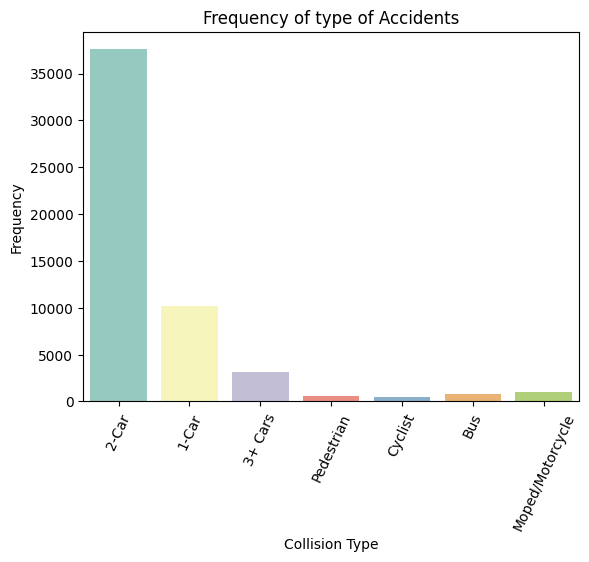

In [248]:
sns.countplot(x=df['Collision Type'],palette='Set3')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Frequency of type of Accidents')

## **6]Weekday Vs Weekend**

Text(0.5, 1.0, 'Weekday Vs Weekend')

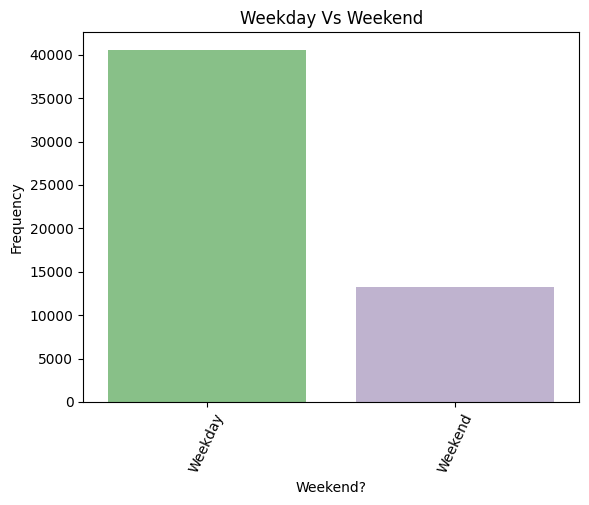

In [249]:
sns.countplot(x=df['Weekend?'],palette='Accent')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Weekday Vs Weekend')

## **7]How do collisions vary during weekends compared to weekdays**

In [250]:
df['Day'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Create a new column for the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['Day_of_Week'] = df['Day'].dt.dayofweek

# Map weekdays (0 to 4) and weekends (5 and 6)
df['Weekday_Type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count the number of collisions for each weekday type
collisions_by_weekday = df.groupby('Weekday_Type').size()

# Display the results
print(collisions_by_weekday)

Weekday_Type
Weekday    38649
Weekend    15230
dtype: int64


## **7]Most Frequent Location Of Accident**

In [251]:
# Check the most frequent location of accidents
most_frequent_location = df['Reported_Location'].value_counts().idxmax()

# Display the most frequent location
print("Most frequent location of accidents:", most_frequent_location)

Most frequent location of accidents: E 3RD ST


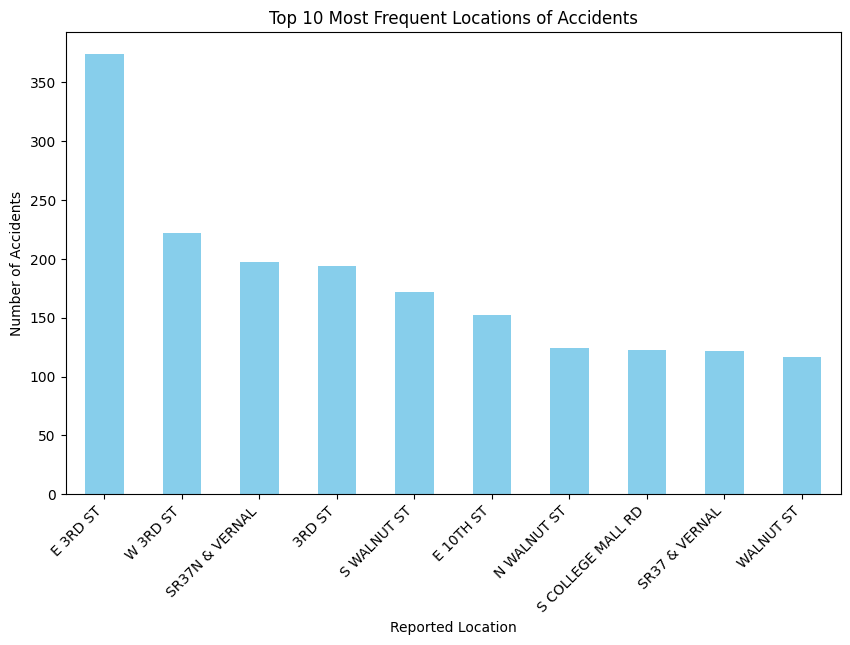

In [252]:
# Check the most frequent location of accidents
most_frequent_location = df['Reported_Location'].value_counts().idxmax()

# Plot a bar chart
plt.figure(figsize=(10, 6))
df['Reported_Location'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Locations of Accidents')
plt.xlabel('Reported Location')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

## **8]Percentage of Injury in Category**

In [253]:


# Assuming 'collision_data' is your DataFrame with the provided columns

# Calculate the percentage of injuries within each category
injury_percentage_by_category = (df['Injury Type'].value_counts() / len(df)) * 100

# Display the results
print("Percentage of Injuries in Each Category:")
print(injury_percentage_by_category)

Percentage of Injuries in Each Category:
No injury/unknown     77.102396
Non-incapacitating    20.662967
Incapacitating         2.021196
Fatal                  0.213441
Name: Injury Type, dtype: float64


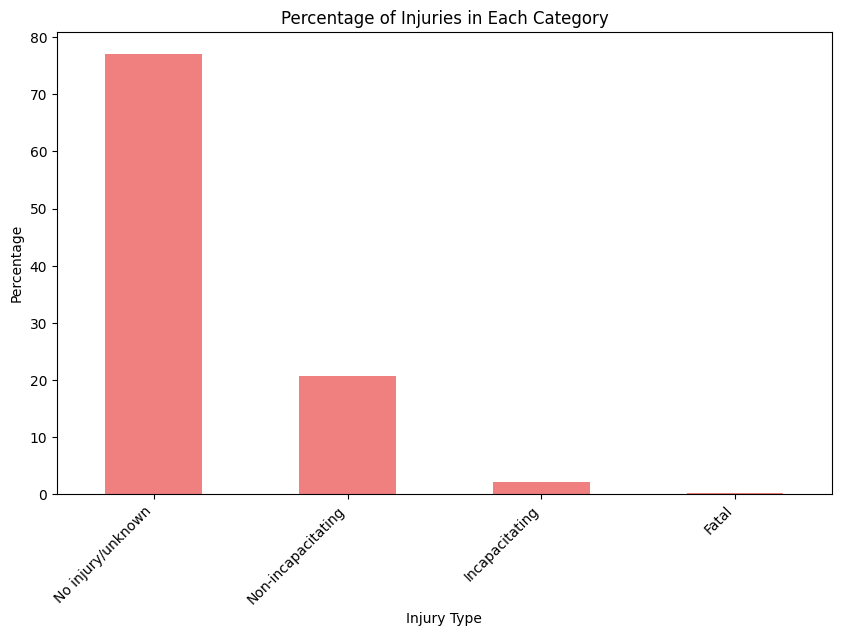

In [254]:
injury_percentage_by_category = (df['Injury Type'].value_counts() / len(df)) * 100

# Plot a bar chart
plt.figure(figsize=(10, 6))
injury_percentage_by_category.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Injuries in Each Category')
plt.xlabel('Injury Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()